# Project: Decision Trees and Random Forest - Loan Eligibility Prediction

------
## Context: 
-------

Credit risk is nothing but the default in payment of any loan by the borrower. In Banking sector this is an important factor to be considered before approving the loan of an applicant.Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

---------
## Objective:
------------
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

--------
## Attributes Information:
------------

* Variable:	------------------------------     Description
* Loan_ID:	-------------------------------          Unique Loan ID
* Gender:	  --------------------------------        Male/ Female
* Married:	-------------------------------          Applicant married (Y/N)
* Dependents:--------------------------	      Number of dependents
* Education:----------------------------      Applicant Education (Graduate/ Under Graduate)
* Self_Employed:--------------------	  Self employed (Y/N)
* ApplicantIncome:-----------------	  Applicant income
* CoapplicantIncome:------------- Coapplicant income
* LoanAmount:------------------------	      Loan amount in thousands
* Loan_Amount_Term:------------  Term of loan in months
* Credit_History:----------------------	  credit history meets guidelines
* Property_Area:----------------------	  Urban/ Semi Urban/ Rural
* Loan_Status:-------------------------	      Loan approved (Y/N)



### Import Libraries and Load Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [2]:
df = pd.read_csv('CreditRisk.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


In [3]:
print(df.shape)

(614, 13)


### Exploring data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 62.5+ KB


In [6]:
# Lets analysze the distribution of the various attribute

df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,614.0,141.166124,88.340630,0.0,98.0,125.0,164.75,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0
Loan_Status,614.0,0.687296,0.463973,0.0,0.0,1.0,1.00,1.0


**Insights:** `CoapplicantIncome and LoanAmount has 0's that can't happen so no need to fill these values`

In [5]:
df.nunique() # Number of unique values in a column

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

**Insights:**
- `Loan_Amount_Term is categorical as it has only 10 unique values`
- `Loan_ID column has all unique values and it not a continous column so it has 614 categories one for each row and that would not provide any info to the algorithm`

In [6]:
cr_df = df.drop('Loan_ID', axis =1 ) # dropping this column as it will be 1-1 mapping anyways
cr_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


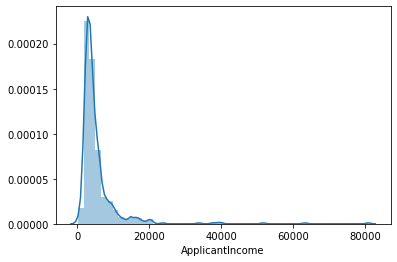

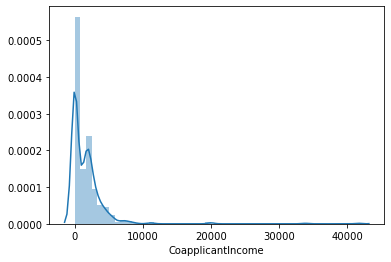

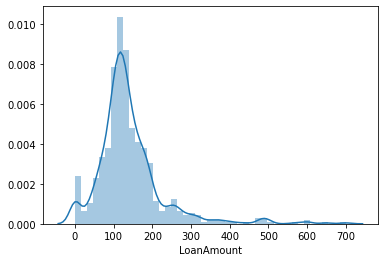

In [7]:
# distplot for continous columns
for i in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
    sns.distplot(df[i])
    plt.show()

In [8]:
cr_df['Loan_Amount_Term'].value_counts(normalize = True)

360.0    0.853333
180.0    0.073333
480.0    0.025000
300.0    0.021667
84.0     0.006667
240.0    0.006667
120.0    0.005000
36.0     0.003333
60.0     0.003333
12.0     0.001667
Name: Loan_Amount_Term, dtype: float64

In [9]:
#The Loan_Amount_Term is highly skewed - so we will delete this column

cr_df.drop(['Loan_Amount_Term'], axis=1, inplace=True)

In [10]:
cr_df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

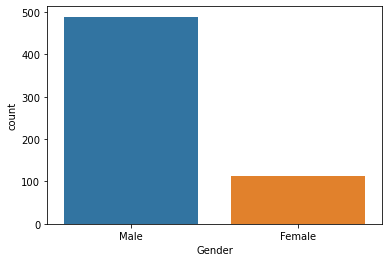

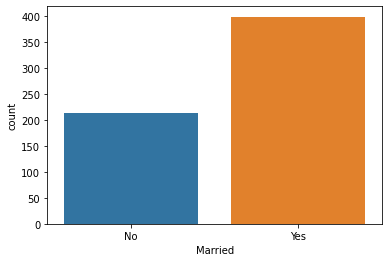

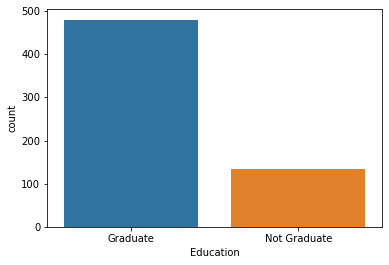

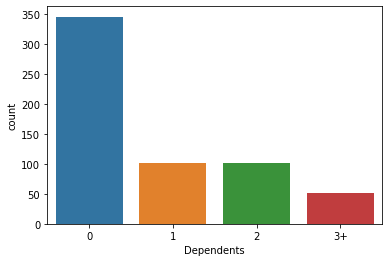

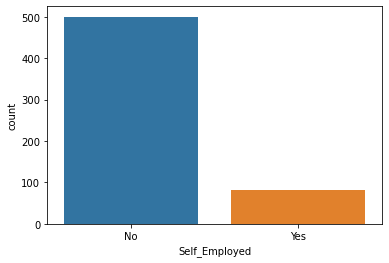

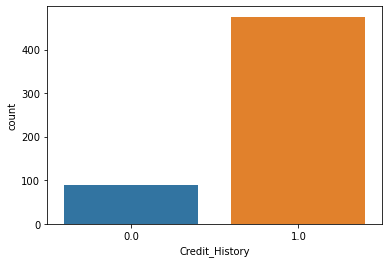

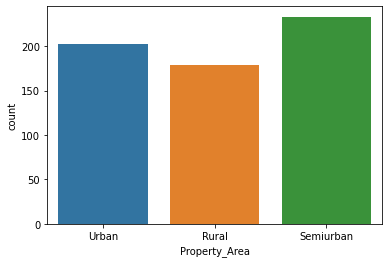

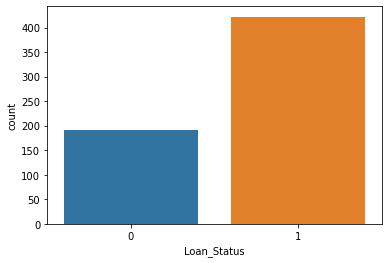

In [11]:
for i in ['Gender','Married','Education','Dependents','Self_Employed','Credit_History','Property_Area','Loan_Status']:
    sns.countplot(cr_df[i])
    plt.show()

### Null Values Treatment


In [12]:
cr_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
cr_df['Credit_History'].fillna(0,inplace=True)

cr_df['Self_Employed'].fillna('No',inplace=True) #replacing with mode

cr_df['Dependents'].fillna('0',inplace=True) #replacing with mode

In [14]:
# Drawing relationship between Loan_Status, Gender, Property_Area, Married

df.groupby(['Loan_Status','Gender','Property_Area'])['Married'].value_counts()

Loan_Status  Gender  Property_Area  Married
0            Female  Rural          No           7
                                    Yes          3
                     Semiurban      No          12
                                    Yes          1
                     Urban          No          10
                                    Yes          4
             Male    Rural          Yes         39
                                    No          18
                     Semiurban      Yes         27
                                    No          12
                     Urban          Yes         35
                                    No          19
1            Female  Rural          No          12
                                    Yes          2
                     Semiurban      No          22
                                    Yes         19
                     Urban          No          17
                                    Yes          2
             Male    Rural          Ye

In [15]:
cr_df[cr_df['Married'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
104,Male,NaN,0,Graduate,No,3816,754.0,160,1.0,Urban,1
228,Male,NaN,0,Graduate,No,4758,0.0,158,1.0,Semiurban,1
435,Female,NaN,0,Graduate,No,10047,0.0,0,1.0,Semiurban,1


**Insights:**
- `When Gender is Male Loan Status is 1 and Propert_Area is Urban then mostly they are married.(mode)`

In [16]:
## Replacing with mode observed in above mentioned relationship:

cr_df.loc[104,'Married'] = 'Yes'
cr_df.loc[228,'Married'] = 'Yes'
cr_df.loc[435,'Married'] = 'No'

In [17]:
cr_df.isnull().sum()

Gender               13
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

### Bivariate Analysis


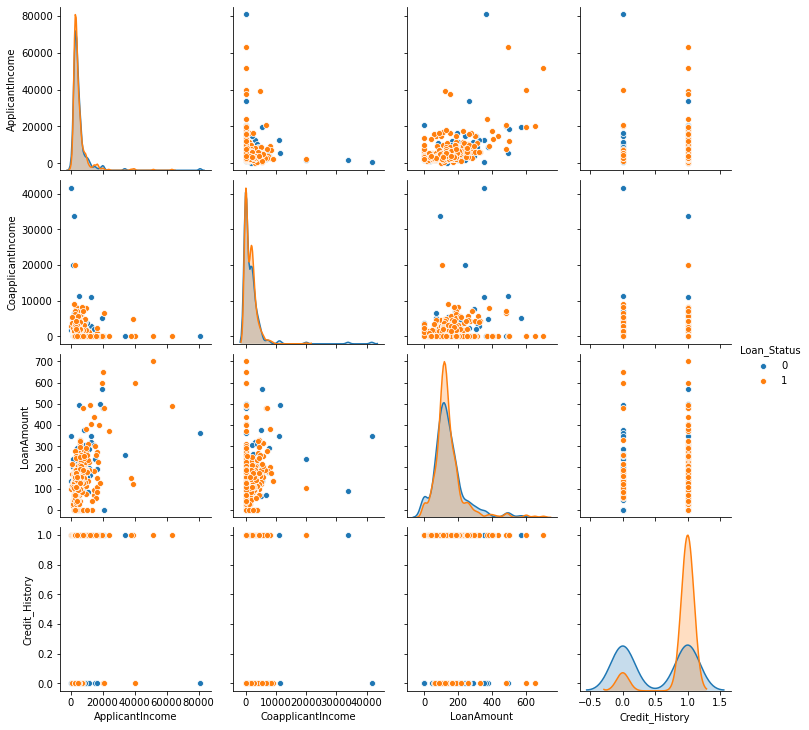

In [18]:
sns.pairplot(cr_df, hue = 'Loan_Status')

In [20]:
cr_df.groupby('Gender')['CoapplicantIncome'].median()


Gender
Female       0.0
Male      1430.0
Name: CoapplicantIncome, dtype: float64

In [21]:
cr_df.groupby('Gender')['CoapplicantIncome'].mean()

Gender
Female    1108.008929
Male      1742.932352
Name: CoapplicantIncome, dtype: float64

In [22]:
pd.crosstab(cr_df['Gender'],cr_df['Loan_Status'],normalize='index')

Loan_Status,0,1
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


In [23]:
pd.crosstab(cr_df['Married'],cr_df['Loan_Status'],normalize='index')

Loan_Status,0,1
Married,,
No,0.369159,0.630841
Yes,0.282500,0.717500


In [24]:
pd.crosstab(cr_df['Education'],cr_df['Loan_Status'],normalize='index')

Loan_Status,0,1
Education,,
Graduate,0.291667,0.708333
Not Graduate,0.388060,0.611940


In [25]:
pd.crosstab(cr_df['Self_Employed'],cr_df['Loan_Status'],normalize='columns')

Loan_Status,0,1
Self_Employed,,
No,0.864583,0.867299
Yes,0.135417,0.132701


**Insights:**
- `Self Employed people have same distribution, We should check how this feature influences final model using coefficients`

In [26]:
pd.crosstab(cr_df['Dependents'],cr_df['Loan_Status'],normalize='columns')

Loan_Status,0,1
Dependents,,
0,0.588542,0.585308
1,0.187500,0.156398
2,0.130208,0.180095
3+,0.093750,0.078199


In [27]:
pd.crosstab(cr_df['Property_Area'],cr_df['Loan_Status'],normalize='columns')

Loan_Status,0,1
Property_Area,,
Rural,0.359375,0.260664
Semiurban,0.281250,0.424171
Urban,0.359375,0.315166


### Data Preparation


In [28]:
# Define X and Y variables

Y = cr_df['Loan_Status'].astype('category')     
X = cr_df.drop(columns = {'Loan_Status'})


In [29]:
# Convert categorical vriables to dummy variables

X = pd.get_dummies(X, drop_first=True)

In [30]:
Y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

### Split the data into train, val and test set

In [31]:
## Split into training and test set
from sklearn.model_selection import train_test_split

# Split in train and test (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=7, stratify = Y)
# Further splt the training set into train and validation (70:30)
X_train, X_val, y_train, y_val =  train_test_split(X_train, y_train, test_size=0.30,random_state=7, stratify = y_train )

### Model building using Decision Trees
 

In [48]:
from sklearn.metrics import classification_report, confusion_matrix, recall_score
from sklearn.tree import DecisionTreeClassifier


In [33]:
#Initialize decision tree with split to be done based on entropy
#Since we have not specified a value for max_depth parameter the tree 
# will expand until all nodes are pure ( i.e. contain only one ( 0 or 1) class in our case)
dtc =  DecisionTreeClassifier(criterion ='entropy', random_state = 27)

In [34]:
# fit the tree (fully grown) and report the metrics on the train set.
# using fit method to fit the train data set using the Tree model
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=27)

In [35]:
#Print classification metrics to analyze the model score
#We will predict the values on the train and the validate dataset
#to evaluate the accuracy on the model

print(classification_report(y_train,dtc.predict(X_train)))
print(classification_report(y_val,dtc.predict(X_val)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       206

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

              precision    recall  f1-score   support

           0       0.45      0.45      0.45        40
           1       0.75      0.75      0.75        89

    accuracy                           0.66       129
   macro avg       0.60      0.60      0.60       129
weighted avg       0.66      0.66      0.66       129



In [36]:
print(confusion_matrix(y_train,dtc.predict(X_train)))
print(confusion_matrix(y_val,dtc.predict(X_val)))

[[ 94   0]
 [  0 206]]
[[18 22]
 [22 67]]


**Insights:** 

1. Overall accuracy is 1 for the training set and 0.66 for the validation set.
2. The training set accuracy is high because of over-fitting, we didn't specify a max depth parameter. This cause the classifer to increase until it has pure leaf nodes.
3. In our scenario of identifying customers who are eligible for loan, its important that we don't give loans to non-eligible customers.Cost of defaulting a loan is very high compared to cost of not giving loans to a few eligible customers. 
4. Recall score can be used evaluate this model because the False Negatives,i.e. the loans which models predicts the loans can be approved but actually the loans are not approved. Such errors are more costly as it increases chance of a default payments.

In [40]:
#Using pos label 0 (minority class to evaluate ) because of imbalance dataset
dict_recall = {}
for max_depth in range(3,21):
   lista = []
   dtree = DecisionTreeClassifier(criterion = 'entropy',max_depth=max_depth, random_state=42)
   dtree.fit(X_train, y_train)
   lista.append(recall_score(y_train, dtree.predict(X_train), pos_label = 0))
   lista.append(recall_score(y_val, dtree.predict(X_val), pos_label = 0))
   dict_recall[max_depth] = lista

In [41]:
df_rc = pd.DataFrame(dict_recall)
df_rc.index = ['Train', 'Val']
df_rc.T

,Train,Val
3,0.531915,0.525
4,0.531915,0.350
5,0.617021,0.375
6,0.691489,0.450
7,0.765957,0.450
8,0.882979,0.425
9,0.936170,0.425
10,0.968085,0.450
11,0.978723,0.450
12,0.978723,0.450


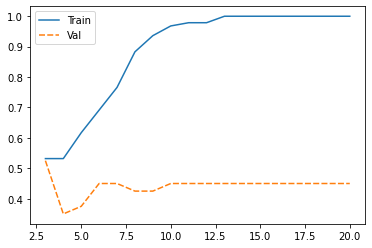

In [42]:
sns.lineplot(data=df_rc.T)

**Comments about the max_depth:**
1. From depth 13 on wards the recall score is constant at 1.
2. We can use level 6 for max_depth as the difference between train and validation is optimal at this level.


In [43]:
dtcf = DecisionTreeClassifier(max_depth = 6, criterion='entropy', random_state=42)

# Fit the data on the train set here
dtcf.fit(X_train,y_train)
# Print the classification report on the test data here
print(classification_report(y_test,dtcf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.53      0.52      0.52        58
           1       0.78      0.79      0.78       127

    accuracy                           0.70       185
   macro avg       0.65      0.65      0.65       185
weighted avg       0.70      0.70      0.70       185



**Observations:**

1. Comparitively decision tree with depth 6 is more accurate as recall score and precision score are improved from the training set.

### Visualise the tree

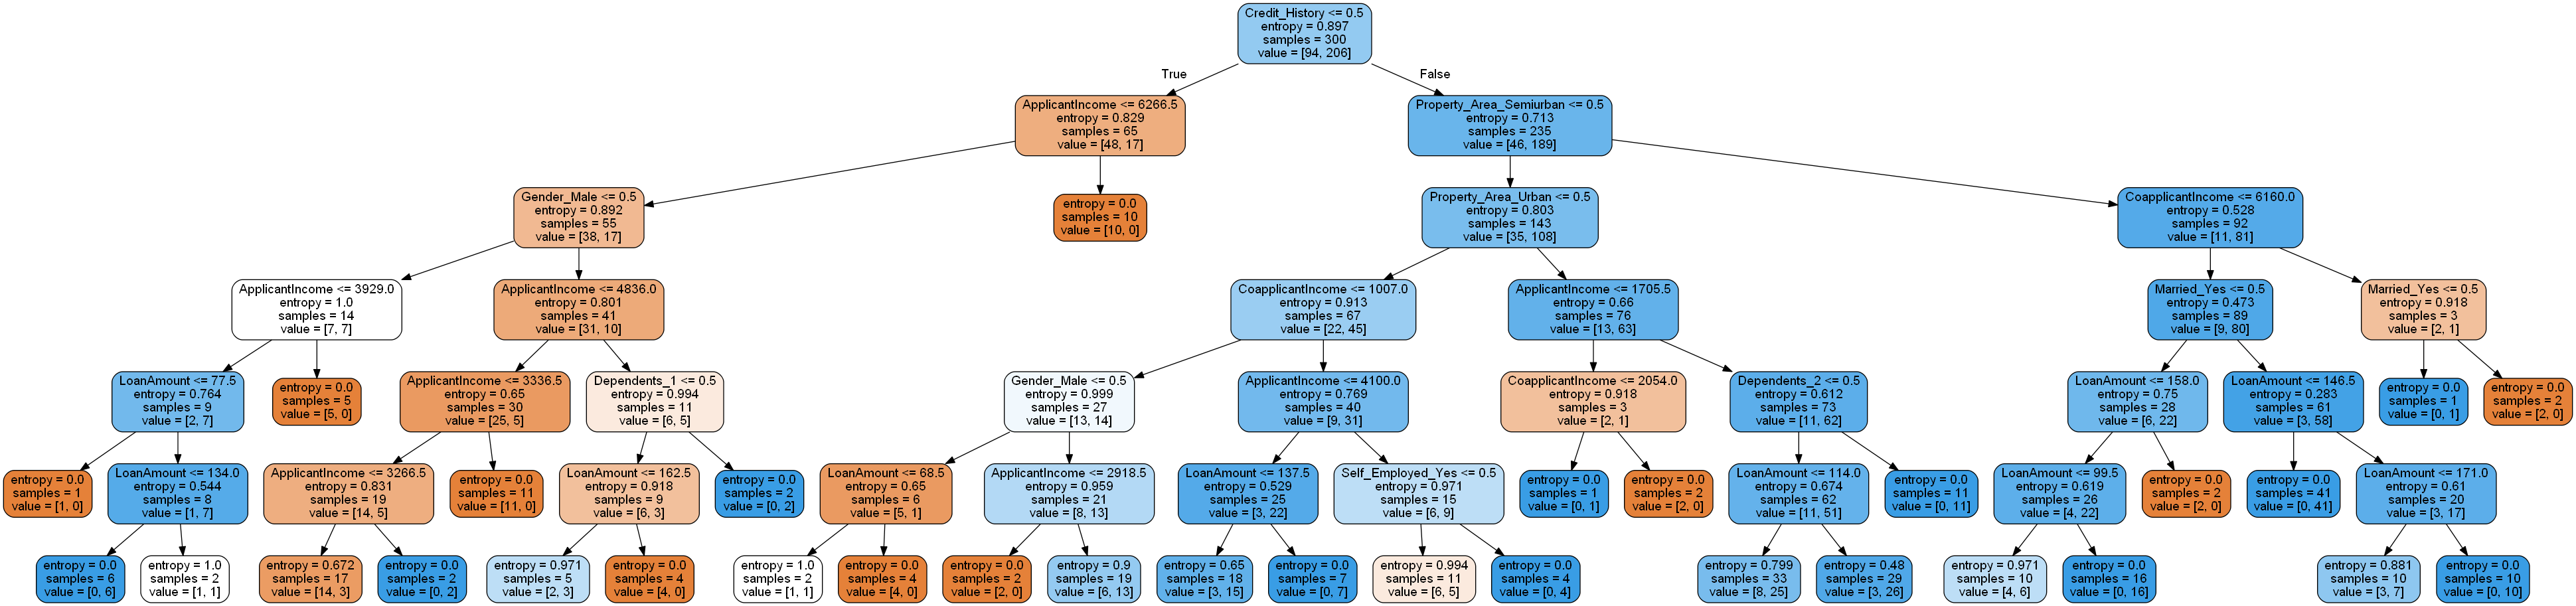

In [44]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

#fill in the blanks below. Pass the columns of the train data as feature_names. 

dot_data = StringIO()
export_graphviz(dtcf, out_file=dot_data, filled  = True, rounded = True, feature_names=X_test.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

### Model building using Random Forests

In [49]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion = 'entropy', n_estimators = 1000, random_state = 42)  #initialise the model

rf.fit(X_train,y_train)

print("*****************for 1000 estimators*****************")
print(classification_report(y_train, rf.predict(X_train)))
print(classification_report(y_val, rf.predict(X_val)))

*****************for 1000 estimators*****************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       206

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

              precision    recall  f1-score   support

           0       0.69      0.50      0.58        40
           1       0.80      0.90      0.85        89

    accuracy                           0.78       129
   macro avg       0.74      0.70      0.71       129
weighted avg       0.77      0.78      0.76       129



In [50]:
from sklearn.metrics import recall_score
dict_recall = {}

for estimators in range(100,1001, 100):
    lista = []
    rfc = RandomForestClassifier(criterion = 'entropy',n_estimators = estimators, random_state=42)
    rfc.fit(X_train,y_train)
    lista.append(recall_score(y_train, rfc.predict(X_train), pos_label = 0))
    lista.append(recall_score(y_val, rfc.predict(X_val), pos_label = 0))
    dict_recall[estimators] = lista

df = pd.DataFrame(dict_recall)
df.index = ['Train', 'Val']
df

,100,200,300,400,500,600,700,800,900,1000
Train,1.000,1.000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Val,0.525,0.525,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


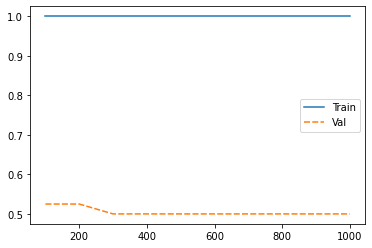

In [49]:
sns.lineplot(data=df.T)

In [51]:
rfcf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)

rfcf.fit(X_train,y_train)
print(classification_report(y_test, rfcf.predict(X_test)))


# report the metrics on the test set here

              precision    recall  f1-score   support

           0       0.53      0.43      0.48        58
           1       0.76      0.83      0.79       127

    accuracy                           0.70       185
   macro avg       0.65      0.63      0.63       185
weighted avg       0.69      0.70      0.69       185



**Observations:** 
 1. Random Forest model is providing slight improvement of Recall score (0.83) for class 1.  
 2. However Recall score for Class 0 is reduced in the random forest model.

### Business Insights 

1. We can use Random Forest on this data set because it has a better recall score. 
2. It will be interesting to use Bagging techniques to evaluate if the performance of the model improves.
3. Both the models are not perfoming better that the average model, on average 70% loans are approved. Overall model accuracy didnt improve than 70% on the test data set.

2. Since this dataset imbalanced, it might be a good strategy to use techniques such as over sampling or SMOTE to train the model. This might increase the overall accuracy of the models.
